In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
FILE_PATHS = [r'cleaned_dataset\df_2020_clean.csv', r'cleaned_dataset\df_2021_clean.csv']

In [54]:
df_2020 = pd.read_csv(FILE_PATHS[0])
df_2021 = pd.read_csv(FILE_PATHS[1])

In [55]:
df_2020[df_2020['account_type'] == 'company'].head()

,donation_id,account_id,shopping_card_id,campaign_id,donation_amount,donation_date,account_type,full_name_(f),company_name,city,address_line_1,state_or_province,zip_code,campaign_name,purpose,fund,tender_type,tribute_full_name_(f)
3,168,183,201,3,7.45,02/21/2020,company,unknown,amazon,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,wire transfer,unknown
4,357,183,390,3,8.38,08/13/2020,company,unknown,amazon,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,check,unknown
5,265,267,298,3,150.00,05/07/2020,company,unknown,american family insurance dreams foundation,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,check,unknown
51,156,175,188,3,250.00,02/26/2020,company,unknown,c.h. robinson,madison,4009 felland rd,wi,53718,2020 annual campaign,general operating,unrestricted,check,unknown
106,458,27,491,3,1007.00,10/05/2020,company,unknown,facebook fundraising,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,check,unknown


In [56]:
df_2020[df_2020['account_type'] == 'company'].groupby('company_name', as_index=False
                                                      ).agg(donation_amount=('donation_amount', 'sum'),
                                                            donation_count=('donation_id', 'count')
                                                            ).sort_values(by='donation_amount', ascending=False)

,company_name,donation_amount,donation_count
3,facebook fundraising,8860.00,11
16,tasc employee philanthropy committee,3500.00,1
7,longtable beer cafe,1460.00,1
13,paypal giving fund,1173.63,2
11,musgrave law office,720.00,1
15,st. martin's council of catholic women,500.00,1
12,nordic consulting partners,500.00,1
8,m3 insurance,500.00,1
5,fidelity charitable,350.00,2
9,middleton outreach ministry,250.00,1


In [57]:
df_2021[df_2021['account_type'] == 'company'].groupby('company_name', as_index=False
                                                      ).agg(donation_amount=('donation_amount', 'sum'),
                                                            donation_count=('donation_id', 'count')
                                                            ).sort_values(by='donation_amount', ascending=False)

,company_name,donation_amount,donation_count
2,facebook fundraising,4217.32,4
3,lea culver family foundation,2500.00,1
5,the amerisourcebergen foundation,1625.00,1
4,pierce family foundation,750.00,1
1,charities aid foundation of america,150.00,1
6,yourcause,120.00,1
0,american family dreams foundation,100.00,1


In [58]:
def plot_company_donations(df, year):
    df_companies = df[df['account_type'] == 'company'].groupby('company_name', as_index=False
                                                               ).agg(donation_amount=('donation_amount', 'sum'),
                                                                     donation_count=('donation_id', 'count')
                                                                ).sort_values(by='donation_amount')
    plt.figure(figsize=(10, 5))
    plt.barh(df_companies['company_name'], df_companies['donation_amount'], color='skyblue')
    plt.xlabel('Donation Amount')
    plt.ylabel('Company Name')
    plt.title('Donation Amount by Company in ' + str(year))
    plt.tight_layout()

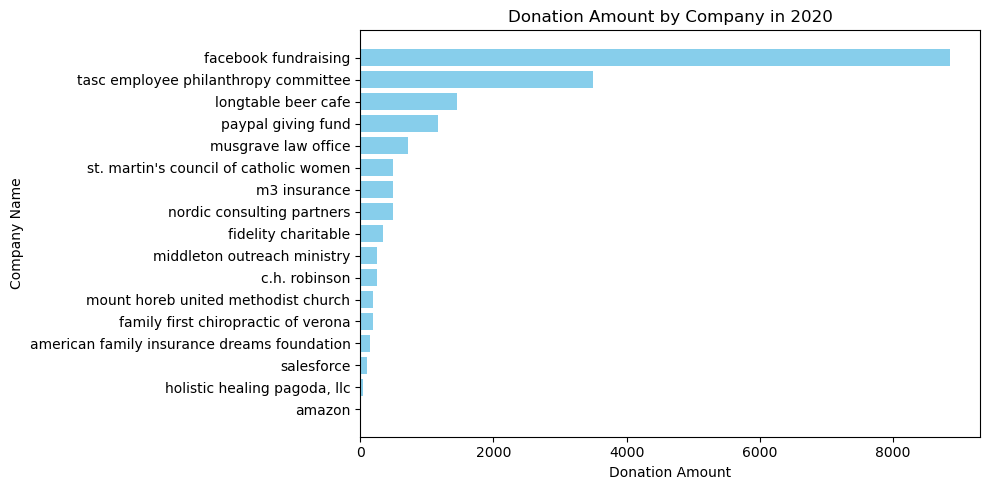

In [59]:
plot_company_donations(df_2020, 2020)

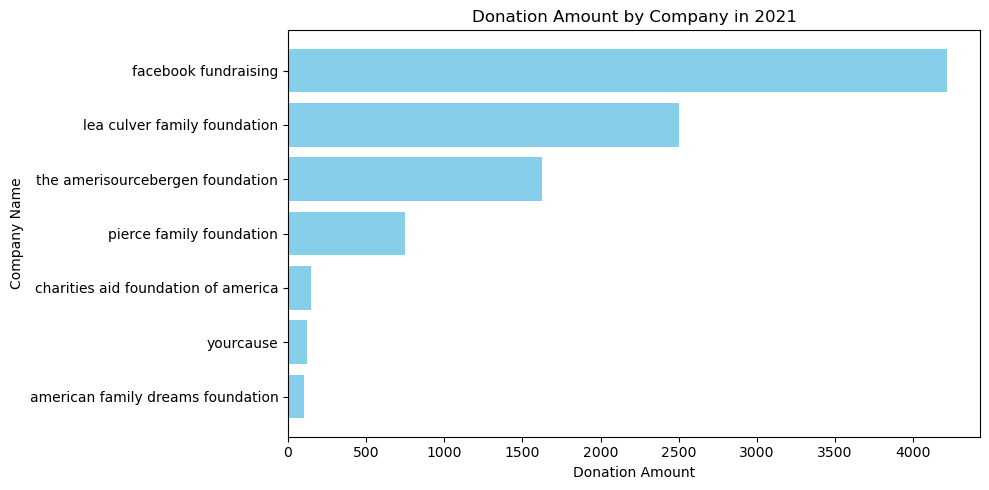

In [60]:
plot_company_donations(df_2021, 2021)